# (Лучкин ИУ6-51Б, Павловский ИУ6-51Б, Левашова ИУ6-53Б)

# Часть1: Logistic Regression / своя логистическая регрессия

## 1) импортируем библиотеки¶

In [9]:
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns

import os # для обработки пути к данным как на Unix-системах, так и на Windows
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets

## 2) загружаем датасет

In [10]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 3) создаём массив "classes", он в дальнейшем понадобится для проверки accuracy

In [11]:
#df = df.sample(frac=1).reset_index(drop=True)
#df

In [12]:
classes = df['species'].value_counts()
classes.index

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

## 4) собираем фичи и таргет данные и создаём тренировочную и тестовую группы

In [13]:
df_train = pd.concat([df[0:40],df[50:90],df[100:140]])
df_train = df_train.sample(frac=1).reset_index(drop=True)
X_train = np.array(df_train.drop(['species'], axis=1))
y_train = (np.array(df_train['species']))
y_train = y_train.reshape((y_train.shape[0], 1))

df_test = pd.concat([df[40:50], df[90:100], df[140:150]])
df_test = df_test.sample(frac=1).reset_index(drop=True)
X_test = np.array(df_test.drop(['species'], axis=1))
y_test = (np.array(df_test['species']))
y_test = y_test.reshape((y_test.shape[0], 1))
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (120, 4)
y_train.shape: (120, 1)
X_test.shape: (30, 4)
y_test.shape: (30, 1)


## 5) создаём класс нашей модели

In [14]:
class LinearRegression:

  def __init__(self, lr, n_epochs):
    self.lr = lr
    self.n_epochs = n_epochs  

  def loss_gradient_w(self, y_pred, y, x):    
    return (1 / self.m) * np.dot(x.T, (y_pred - y))

  def loss_gradient_b(self, y_pred, y):
    return np.sum(y_pred - y) / self.m

  def fit(self, x, y):
    self.m, self.n = x.shape
    self.w = np.zeros((self.n,1))
    self.b = 0
    for i in range(self.n_epochs):
      self.w -= self.lr * self.loss_gradient_w(self.predict(x), y, x)
      self.b -= self.lr * self.loss_gradient_b(self.predict(x), y)
      #print(f"MSE: {self.mse(y, self.predict(x))}")
  def features(self):
    return self.w

  def base(self):
    return self.b

  def predict(self, x):
    #print(np.dot(x, self.w) + self.b)
    return np.dot(x, self.w) + self.b

In [17]:
class LogisticRegression:

  def __init__(self, lr, n_epochs):
    self.lr = lr
    self.n_epochs = n_epochs

  def fit(self, x, y):
    self.classes = df['species'].value_counts()
    #print(self.classes)
    self.neurons_numb = classes.count()
    self.neuron = np.array([LinearRegression(self.lr, self.n_epochs) for _ in range(self.neurons_numb)])
    train_y = np.zeros((y.shape[0], 1, self.neurons_numb))
    #print(x.shape, train_y[:, :, 0].shape)
    for j in range(self.neurons_numb):
        print(f"\033[1;32m{self.classes.index[j]}")
        #print(f"{self.neuron[j].n_epochs}") 
        for i in range(y.shape[0]):
            if y[i] == self.classes.index[j]:
                train_y[i][0][j] = 1
            else: 
                train_y[i][0][j] = 0
        self.neuron[j].fit(x, (train_y[:, :, j]))
        print(f"\033[1;33m neuron {j}")
        print(f"features: \n{self.neuron[j].features()}")
        print(f"base = {self.neuron[j].base()}")
    #print(f"\033[1;32m {train_y}")   
  def softmax(self,x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

  def neurons_predict(self, x):
    y_mass_predict = [0.0, 0.0, 0.0]
    for j in range(self.neurons_numb):
        y_mass_predict[j] = self.neuron[j].predict(x)
    return y_mass_predict

  def predict(self,x):
    self.soft_result = model.softmax(model.neurons_predict(x))
    self.soft_result = self.soft_result.T
    #print(self.soft_result)
    y_predict = np.zeros((self.soft_result.shape[1], 1))
    self.y_result = np.zeros((self.soft_result.shape[1], 1))
    #print(self.soft_result[0][0])
    #print(self.soft_result[1][0])
    #print(self.soft_result[2][0])
    for j in range(self.soft_result.shape[1]):
        max = 0
        max_index = -1
        for i in range(self.soft_result.shape[2]):
           if max < self.soft_result[0][j][i]:
               max = self.soft_result[0][j][i]
               self.y_result[j] = i 
           #print(self.soft_result[0][j][i])
        print("{0:.1f}%".format(max * 100),  ' ', self.classes.index[self.y_result[j][0]])
        
    return self.y_result

## 6) создаём и обучаем нашу модель на тренировочной группе

In [18]:
model = LogisticRegression(10e-3, 200000)
model.fit(X_train, y_train)

setosa
 neuron 0
features: 
[[ 0.03822064]
 [ 0.2545579 ]
 [-0.17856338]
 [-0.12797785]]
base = 0.15836091859582738
versicolor
 neuron 1
features: 
[[ 0.06930835]
 [-0.50350064]
 [ 0.07195904]
 [-0.25225391]]
base = 1.4954350206023448
virginica
 neuron 2
features: 
[[-0.10752897]
 [ 0.24894276]
 [ 0.10660433]
 [ 0.38023175]]
base = -0.6537960958939094


## 7) выводим результат предасказания модели на тестовых данных и ожидаемый результат

In [19]:
result = model.predict(X_test)

C:\Users\fluch\AppData\Local\Temp/ipykernel_23920/724502206.py:53: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  print("{0:.1f}%".format(max * 100),  ' ', self.classes.index[self.y_result[j][0]])


56.4%   setosa
45.2%   versicolor
55.0%   setosa
46.4%   virginica
53.9%   virginica
44.2%   virginica
52.5%   setosa
39.8%   versicolor
49.8%   virginica
54.0%   setosa
40.1%   versicolor
35.0%   virginica
57.9%   setosa
50.0%   setosa
52.9%   setosa
53.1%   setosa
45.7%   virginica
56.7%   virginica
41.7%   versicolor
37.2%   versicolor
42.5%   versicolor
41.9%   versicolor
50.0%   virginica
57.7%   virginica
38.9%   versicolor
37.1%   versicolor
37.5%   virginica
35.6%   versicolor
58.0%   setosa
54.2%   virginica


In [20]:
for i in range(y_test.shape[0]):
    print(y_test[i])

['setosa']
['versicolor']
['setosa']
['virginica']
['virginica']
['virginica']
['setosa']
['virginica']
['virginica']
['setosa']
['versicolor']
['versicolor']
['setosa']
['setosa']
['setosa']
['setosa']
['virginica']
['virginica']
['versicolor']
['versicolor']
['setosa']
['versicolor']
['virginica']
['virginica']
['versicolor']
['versicolor']
['versicolor']
['versicolor']
['setosa']
['virginica']


## 8) считаем accurancy

In [19]:
nice = 0
for i in range(y_test.shape[0]):
    #print(y_test[i][0] == classes.index[result[i][0]])
    if y_test[i][0] == classes.index[result[i][0]]:
        nice = nice + 1
print(f"\033[1;32mmodel accuracy = ", '{0:.1f}%'.format((nice / y_test.shape[0]) * 100))
    

model accuracy =  86.7%


C:\Users\fluch\AppData\Local\Temp/ipykernel_22832/3816044165.py:4: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  if y_test[i][0] == classes.index[result[i][0]]:


#  Часть 2: разобрать алгоритм SVM (пример кода для разбора алгоритма взят отсюда: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

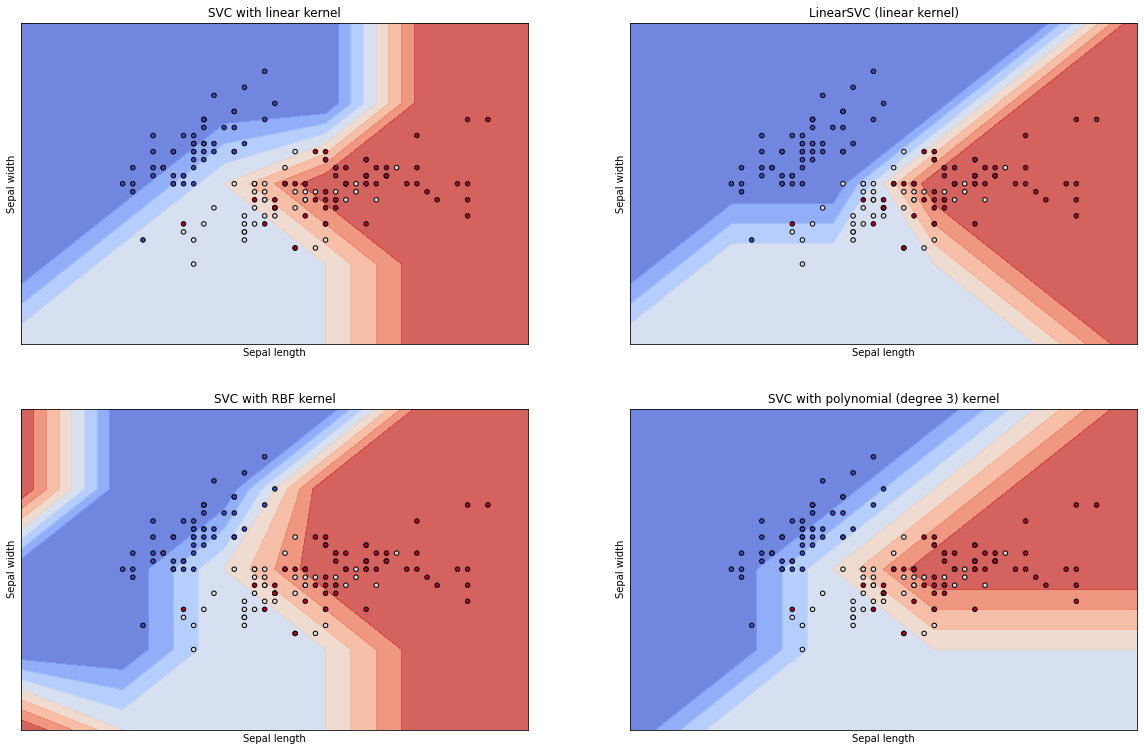

In [8]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x_svc, y_svc):
    """  Эта функция создаёт сетку точек для графика;
         x_svc - это данные для построения по оси X;
         y_svc - этоданные для построения  по оси Y;
         Функция meshgrid() создает список массивов координатных 
     сеток N-мерного координатного пространства для указанных 
     одномерных массивов координатных векторов.
    """
    x_min, x_max = x_svc.min() - 1, x_svc.max() + 1
    y_min, y_max = y_svc.min() - 1, y_svc.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """"Эта функция нужна для построения границ решения для классификатора.
     ax - это объект оси matplotlib
     clf - это классификатор
     xx - это сетка ndarray
     yy - это meshgrid ndarray
     contourf() рисует закрашенные контуры
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X2 = iris.data[:, :2]
y2 = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X2, y2) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(20,13))

X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y2, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()